# Ohm's law 
- plot data from txt file
- fit the data
- save plot (.png , etc)
## txt file contains text lines and numerical data
- Comments: # for **single line comment** and ''' lines ''' for **multilines comment**
- **Shortcut command to run** file.ipynb in Jupyter in windows OS: Shift+Enter 
- 
- open txt file
- create empty lists for x and y values
- read line by line from txt file
- if line starts with any character (here #), continue without doing anything
- if line starts with other than #, then slpit the line by delimiter (here is a space)
- specify which are which
- add those values in respective parameters, if needed
- plot interested lists
- format plot
- save plot

In [3]:
import matplotlib.pyplot as plt         
import numpy as np

- methods to open file using python
1. \
 f = open("test.txt", mode='r', encoding = 'utf-8') \
 perform file operations \
f.close() \
2. \
with open("test.txt", mode='r', encoding = 'utf-8') as f: \
    perform file operations \
3. \
try:\
     (one tab space) f = open("test.txt", encoding = 'utf-8') \
    (one tab space) perform file operations \
finally: \
   (one tab space) f.close()

x [10.0, 15.0, 2.0, 15.5, 10.0, 12.0, 8.0, 3.5]
y [5.0, 7.5, 1.0, 8.0, 5.0, 6.0, 4.5, 1.5]
R [0.5, 0.5, 0.5, 0.5161290322580645, 0.5, 0.5, 0.5625, 0.42857142857142855]


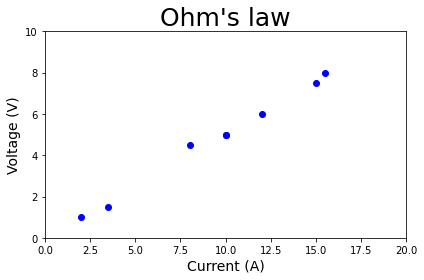

In [25]:
with open ("exampledata.txt",'r') as f:
    X = []                                      # create blank list for x axis values
    Y = []
    R = []
    r0 = []
    for line in f:                              #each lin in file f
        #print(line)
        if line.startswith("#"):                #if line start with # character, continue without doing any work
            #print(line)
            continue
        else:                                   #if line start with othern than # then slpit the line by a space ' '
            lineParts = line.split(' ')
            #print(lineParts)
            t = lineParts[0]                    # after slpit, 0 intexed value is time
            #print(t)
            x = float(lineParts[1])             # 1 intexed value is x, check w/wo float()
            #print(x)
            X.append(x)                         # add values of x in list X
            #print(X)
            y = float(lineParts[2])        
            #print(y)
            r = y / x
            #print("resistance = ", r,"Ohm")
            Y.append(y)
            '''print(Y)'''                       # two ways of commenting
            #print(Y)
            #print(i,'\t',x,'\t',y)
            R.append(r)
            r0.append(r)
            #print(r0)
#print(i,x,y)
print("x",X)
print("y",Y)
print("R",R)
#print(len(R))
avgR = sum(R)/len(R)
myMean = np.mean(R)
#print(myMean)
#print("resistance = ", avgR ,"Ohm")
#print(X,Y)

plt.figure(figsize = [6,4])                      #figsize(width, height) in inches
#plt.bar(X,Y)       # ^ . try withh plt.plot
plt.scatter(X,Y,color = 'blue', marker = 'o')       # ^ . try withh plt.plot
plt.axis([0, 20, 0, 10])                         #axis[xmin,xmax, ymin,ymax]
#another way to set axis limit
#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)
plt.title("Ohm\'s law" , fontsize=25)
plt.xlabel('Current (A)', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.tight_layout()                             # this is for margin
#plt.grid(True)                                 # comment this if u do not need grid
plt.savefig("Ohm-plot.png")                    # png, jpg, eps, pdf as u like
plt.show()

--------------------
## curve_fit 
- define fitting function, f
- Use non-linear least squares to fit a function, f, to xdata.\
popt, pcov = scipy.optimize.curve_fit(f, xdata, ydata, [p0,..])\
OR \
popt, pcov = curve_fit(f, xdata, ydata) \
OR \
popt, _ = curve_fit(f, xdata, ydata) 

- output\
popt = optimized parameters \
pcov = The estimated covariance of popt. \
The diagonals provide the variance of the optimized parameters.
- Standard deviation errors on the parameters, perr = np.sqrt(np.diag(pcov)).\
(details: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html )

[ 0.51343284 -0.06511194]
[[ 0.00031197 -0.00296368]
 [-0.00296368  0.03468675]]
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
[0.96175373 1.47518657 1.9886194  2.50205224 3.01548507 3.52891791
 4.04235075 4.55578358 5.06921642 5.58264925 6.09608209 6.60951493
 7.12294776 7.6363806  8.14981343]


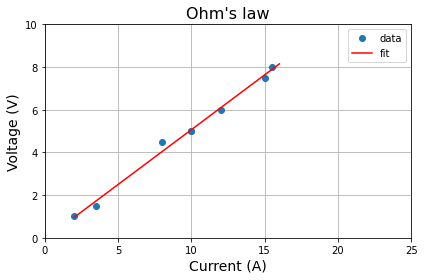

In [32]:
from scipy.optimize import curve_fit

#curve_fit to find best fit parameters using a least square fit method.
def lin_fun(x,a1,a2):
    return a1*x + a2
def lin_f1(x,a1,a2):
    return a1*x**2 + a2

popt,pcov = curve_fit(lin_fun,X,Y)
p1,p2 = popt
print(popt)
print(pcov)
#print("R = ", popt[0], "+-", pcov[0,0]**0.5)
#print("intercept = ", popt[1], "+-", pcov[1,1]**0.5)

# for smooth fit curve
X_fit = np.arange(min(X),max(X)+1.0,1)
Y_fit = lin_fun(X_fit, p1, p2)
print(X_fit)
print(Y_fit)

plt.figure(figsize = [6,4])                      #figsize(width, height) in inches
plt.plot(X,Y,"o", label = "data")
plt.plot(X_fit,Y_fit,"-", label = "fit", color ="red")
plt.axis([0, 25, 0, 10])                         #axis[xmin,xmax, ymin,ymax]
plt.title("Ohm\'s law" , fontsize=16)
plt.xlabel('Current (A)', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.tight_layout()                             # this is for margin
plt.grid(True)                                 # comment this if u do not need grid
plt.legend()
plt.savefig("Ohm-plot-fit0.png")  
plt.show()